In [3]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [4]:
target_edges = pickle.load(open('output_data/target_edges_small.p','rb'))
existing_edges = pickle.load(open('output_data/existing_edges_small.p','rb'))
possible_edges = pickle.load(open('output_data/possible_edges_small.p','rb'))
candidate_edges = pickle.load(open('output_data/candidate_edges_small.p','rb'))
CalcG = pickle.load(open('output_data/CalcG_small.p','rb'))

In [36]:
THRESHOLD = 0.04
predicted_edges_random = set()

for v,i in candidate_edges :
    if CalcG[v][i]['score']['random'] > THRESHOLD:
        predicted_edges_random.add((v,i))

def print_TPFPTNFN(E, T, PRED, printing=False):
    TP = len(PRED.intersection(T))
    FP = len(PRED.intersection(E - T))
    TN = len((E-PRED).intersection(E-T))
    FN = len((E-PRED).intersection(T))
    recall = 0 if not(TP+FN) else TP / (TP + FN)
    precision = 0 if not(TP+FP) else TP / (TP + FP)
    if printing :
        print("TP ", TP)
        print("FP ", FP)
        print("TN ", TN)
        print("FN ", FN)
        print("Recall", recall)
        print("Precision", precision)
    return TP, FP, TN, FN, recall, precision

print_TPFPTNFN(candidate_edges, target_edges, predicted_edges_random, printing=True);

TP  2
FP  907
TN  34
FN  0
Recall 1.0
Precision 0.0022002200220022


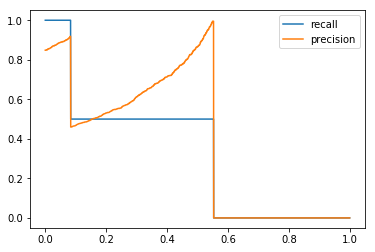

In [37]:
THRESHRANGE = [0.0005* i  for i in range(2000)]
recalls = []
precisions = []
for THRESHOLD_ in THRESHRANGE :
    predicted_edges_random = set()

    for v,i in candidate_edges :
        if CalcG[v][i]['score']['random'] > THRESHOLD_:
            predicted_edges_random.add((v,i))
    _,_,_,_,R, Pr = print_TPFPTNFN(candidate_edges, target_edges, predicted_edges_random)
    recalls.append(R)
    precisions.append(Pr)
    
plt.plot(THRESHRANGE, recalls, label='recall')
plt.plot(THRESHRANGE, 400*np.array(precisions), label='precision')
plt.legend()
plt.show()

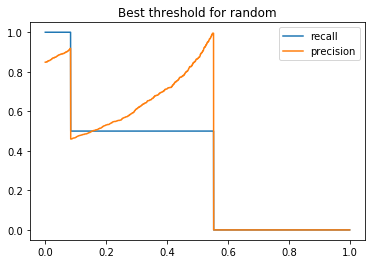

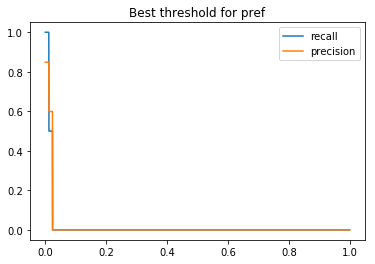

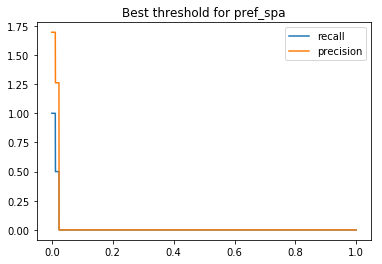

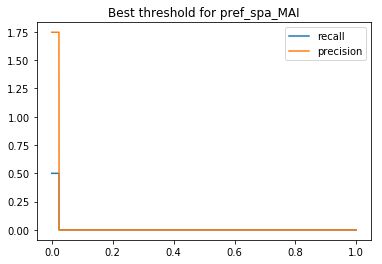

In [39]:
SCORETYPERANGE = ['random', 'pref', 'pref_spa', 'pref_spa_MAI']
for TYPESCORE in SCORETYPERANGE :
    THRESHRANGE = [0.0005* i  for i in range(2000)]
    recalls = []
    precisions = []
    for THRESHOLD_ in THRESHRANGE :
        predicted_edges_random = set()

        for v,i in candidate_edges :
            if CalcG[v][i]['score'][TYPESCORE] > THRESHOLD_:
                predicted_edges_random.add((v,i))
        _,_,_,_,R, Pr = print_TPFPTNFN(candidate_edges, target_edges, predicted_edges_random)
        recalls.append(R)
        precisions.append(Pr)
    plt.title("Best threshold for {0}".format(TYPESCORE))
    plt.plot(THRESHRANGE, recalls, label='recall')
    plt.plot(THRESHRANGE, np.array(precisions,dtype=np.float64), label='precision')
    plt.legend()
    plt.show()